### Assignment 4 ###


In [98]:
# Import required libraries 
import numpy as np
import pandas as pd

import math
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns


In [99]:
# Q5_ read the beer file 
beerrating_df=pd.read_excel('Q5_Beer_Taste.xlsx')

beerrating_df.sample(10)

,Person,Rating
6,7,81
1,2,57
22,23,59
57,58,62
4,5,94
23,24,91
34,35,93
28,29,76
8,9,95
10,11,67


In [100]:
#Q5 Check Data Quality
beerrating_df.set_index('Person', inplace=True )
beerrating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rating  60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [101]:
beerrating_df.sample(5)

,Rating
Person,
14,58
49,91
7,81
10,82
45,90


In [102]:
beerrating_mean=beerrating_df['Rating'].mean()
beerrating_sd=beerrating_df['Rating'].std()
print('The beerrating mean is %2f and the stad deviation is %2f ' %(beerrating_mean,beerrating_sd) )

The beerrating mean is 79.750000 and the stad deviation is 14.502630 


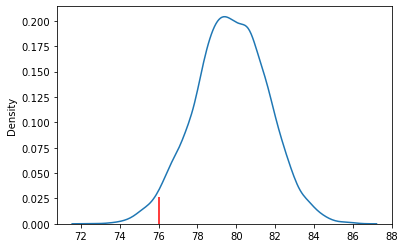

In [103]:
# let us draw  the population 
pop_rating=st.norm.rvs(loc=beerrating_mean,scale=beerrating_sd/math.sqrt(60),size=6000 )
sns.kdeplot(pop_rating)
plt.vlines(x=76,ymin=0,ymax=0.026,colors='r')

$$ Null Hypothesis: \mu \le 76$$
$$ Alternate Hypotesis: \mu > 76$$

$$P(Sample Mean > 76 \mid mean \le 76)$$

In [104]:
z= (76-beerrating_mean)/math.sqrt(beerrating_sd/20)
print(z)

-4.403752319687284


In [105]:
p_val =st.norm.cdf(z)
print('Calculated P-value is %3f ' % p_val)

Calculated P-value is 0.000005 


In [106]:
# Q5 Since the the p value is very low , we may reject the "Null Hypothesis"
# The 2 0 smaple  beer rating will have a scaore of higher than 76

 ## Q6 {Low calorie Drink Priference} ##

In [40]:
drink_pref_df=pd.read_excel('Q6_LowcalorieDrink.xlsx')
drink_pref_df.sample(10)

,Consumer,Gender,Age,Preference
59,60,M,Over 60,Our brand
146,147,M,Between 20 and 40,Competing brand
128,129,F,Between 40 and 60,Our brand
83,84,F,Between 20 and 40,Our brand
143,144,F,Between 20 and 40,Competing brand
82,83,F,Between 40 and 60,Our brand
41,42,M,Less than 20,Our brand
247,248,F,Between 40 and 60,Our brand
199,200,F,Between 20 and 40,Our brand
173,174,M,Less than 20,Competing brand


In [41]:
drink_pref_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Consumer    250 non-null    int64 
 1   Gender      250 non-null    object
 2   Age         250 non-null    object
 3   Preference  250 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.9+ KB


In [42]:
drink_pref_df.set_index('Consumer',inplace=True)

In [43]:
drink_pref_df.head()

,Gender,Age,Preference
Consumer,,,
1,F,Over 60,Our brand
2,F,Between 40 and 60,Our brand
3,M,Between 40 and 60,Our brand
4,F,Over 60,Competing brand
5,M,Between 20 and 40,Our brand


In [57]:
drink_pref_df.groupby('Preference').agg(["count"])

,Gender,Age
,count,count
Preference,,
Competing brand,116,116
Our brand,134,134


In [64]:
per_ourbrand =116/250
per_compbrand=134/250

#assume poulation s choice for our brand will be normally distributed
#P-hat +/- z_a/2*sqrt((p-hat*q-hat)/n)

print('our brand preference in the sample is  %2f percent'%round(per_ourbrand*100))

our brand preference in the sample is  46.000000 percent


In [62]:
(0.46+(1.96*math.sqrt(.46*.54/250)),0.46-(1.96*math.sqrt(.46*.54/250)))

(0.5217819857239956, 0.3982180142760044)

In [66]:
# In the poulation the choice for our brand will be between 52% to 40% given 95 percent confidence level 

#b) The sample data does not provide information on geographies (urban / rural )- so asserattion is false.

#C) sample is unnecessary large to judge brand preference

## Questtion 7 ##

In [71]:
battery_df=pd.read_csv('Q7_Battery_life.csv')
battery_df.sample(10)

,Battery,Lifetime
64,65,99.00
67,68,99.03
69,70,94.80
1,2,99.45
13,14,100.39
92,93,98.99
82,83,106.71
89,90,101.17
77,78,100.65
12,13,101.23


In [72]:
battery_df.set_index('Battery',inplace=True)

In [73]:
battery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lifetime  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [75]:
battery_df.sample(5)

,Lifetime
Battery,
86,103.74
23,103.91
42,102.67
11,96.98
29,99.51


In [97]:
battery_mean=battery_df['Lifetime'].mean()
battery_sd=battery_df['Lifetime'].std()
print('battery life mean = %.3f and Standard Deviation = %.3f '% (battery_mean, battery_sd))

battery life mean = 100.090 and Standard Deviation = 2.821 


In [109]:
st.chi2.ppf(1-.05, df=11)

19.67513757268249